## Analysis of Retail Customer data

Spending pattern of a group of customers is being analysed. Clustering techniques are used to find the Customer segments, which can be used to target various groups for campaigns.

In [234]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
sns.set()

In [235]:
def plot_hist(df,col,title = None,xlabel = None,ylabel = None):
    """
    Plots  histogram 
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 6),dpi=144)
 
    sns.histplot(data=df, x=df[col[0]], kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=df, x=df[col[1]], kde=True, color="olive", ax=axs[1])
    
    skew_0=df[col[0]].skew()
    kurtosis_0= df[col[0]].kurtosis()

    skew_1=df[col[1]].skew()
    kurtosis_1= df[col[1]].kurtosis()
    

    axs[0].text(100, 35, f"Skew: {skew_0:.2f}\nKurtosis: {kurtosis_0:.1f}", fontsize=12, color='black')
    axs[1].text(55, 40, f"Skew: {skew_1:.2f}\nKurtosis: {kurtosis_1:.1f}", fontsize=12, color='black')
    
    if title is not None:
        axs[0].title.set_text(title[0])
        axs[1].title.set_text(title[1])
        
    plt.savefig('hist_Cust.jpg',bbox_inches = 'tight')
    plt.show()
    

In [236]:
def plot_heatmap(df):
    """
    Plots Heatmap
    """
    fig, ax = plt.subplots(dpi=144)
    mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
    sns.heatmap(df.corr(numeric_only=True), ax=ax, vmin=-1, vmax=1,
            cmap='RdBu',annot=True)
    plt.xticks([0,1,2],['Age','Annual Income','Spending Score'],rotation=25)
    plt.yticks([0,1,2],['Age','Annual Income','Spending Score'])

    plt.title("Correlation of Retail Customer Attributes")
    plt.savefig('heatmap_Cust.jpg',bbox_inches = 'tight')
    

In [311]:
def plot_scatter(x, y,hue):
    """
    Creates a scatter plot of x and y data with a fitted line and error margins
    """
    plt.figure(dpi=144)
    sns.scatterplot(x=x, y=y,hue=hue)
   
    plt.ylabel('Spending Score (1-100)')
    plt.xlabel('Age')
    plt.title('Annalysis of Spending Score vs Age')
    plt.legend()
    plt.savefig('scatter01.jpg',bbox_inches = 'tight')
    plt.show()


In [238]:
def linfunc(x, a, b):
    """
    A linear function for fitting
    """    
    return a * x + b
    

In [239]:
def plot_scatter_with_fitted_line(x, y, linfunc, p, sigma):
    """
    Creates a scatter plot of x and y data with a fitted line and error margins
    """
    plt.figure(dpi=144)
    sns.scatterplot(x=x, y=y, label='Data points')
    
    # Fitted line
    xfit = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(xfit, linfunc(xfit, *p), 'k-', label='Fitted line')
    
    # Error margins
    plt.fill_between(
        xfit,
        linfunc(xfit, p[0] - sigma[0], p[1] - sigma[1]),
        linfunc(xfit, p[0] + sigma[0], p[1] + sigma[1]),
        color='pink', alpha=0.5, label='Error margins'
    )
    
    # Formatting
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.title('Age vs. Annual Income: Linear Fit with Confidence Intervals')
    plt.legend()
    plt.savefig('scatter_Cust.jpg',bbox_inches = 'tight')
    plt.show()


In [240]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [241]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    ax.title.set_text("Elbow Plot: Determining the Optimal Number of Clusters")
    plt.savefig('elbow_Cust.jpg',bbox_inches = 'tight')
    plt.show()
    return

In [242]:
def plot_fitted_Cluster(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap='viridis', marker='o', label='Data')

    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap, marker='x', s=100, label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)') 
    ax.title.set_text("Cluster Fitting for Annual Income and Spending Score")
    plt.savefig('cluster_Cust.jpg',bbox_inches = 'tight')
    plt.show()
    return

Load the Source File into dataframe for Exploratory Analysis

In [244]:
df_cust = pd.read_csv('Retail_Customers.csv')

Statistical analysis of Data

In [246]:
df_cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Plot a Heatmap to analyse the correlation between the various fields of Retail customer data

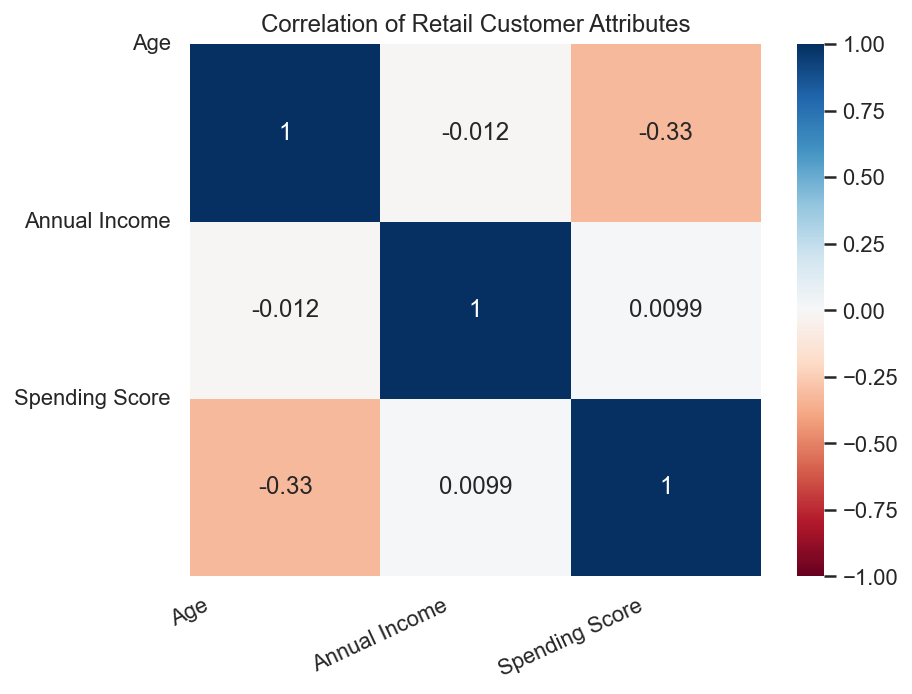

In [248]:
df_heatmap = df_cust[['Age','Annual Income (k$)','Spending Score (1-100)']].copy()
plot_heatmap(df_heatmap)


Skewness of the Attributes of Retail Customers

In [250]:
df_cust[['Annual Income (k$)','Spending Score (1-100)','Age']].skew()

Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
Age                       0.485569
dtype: float64

Kurtosis of Attributes of Retail Customers

In [252]:
df_cust[['Annual Income (k$)','Spending Score (1-100)','Age']].kurtosis()

Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
Age                      -0.671573
dtype: float64

Histogram is Plotted showing the distribution of Annual Income and Age. According to the plot,maximum customers are having an annual income between $50k - $65k and the main customer age group is between 30- 35. A slight right skew can be observed in the values.

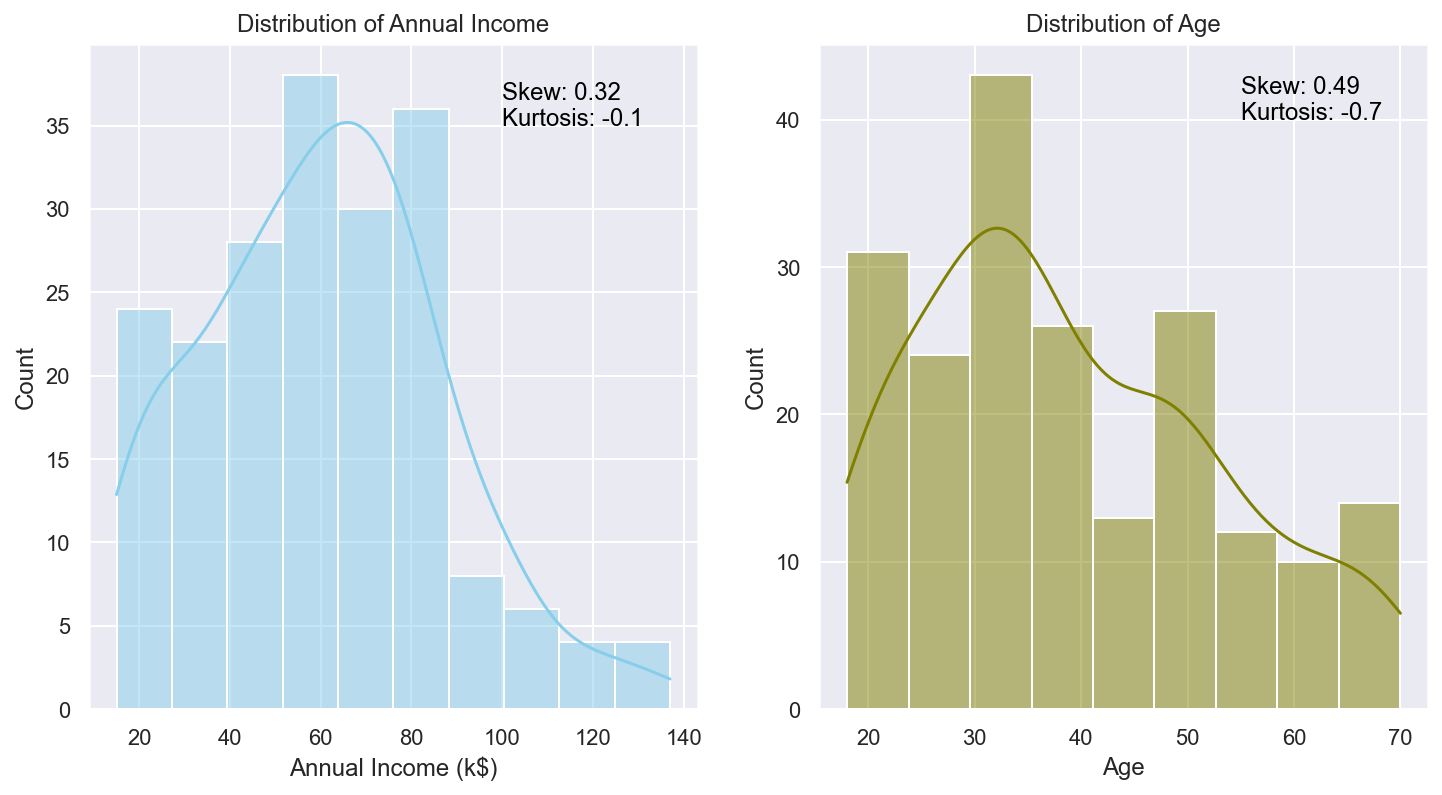

In [254]:
col=['Annual Income (k$)','Age']
title=['Distribution of Annual Income','Distribution of Age']
plot_hist(df_cust,col,title)


Scatter plot showing the relationship between Annual Income and Spending Score

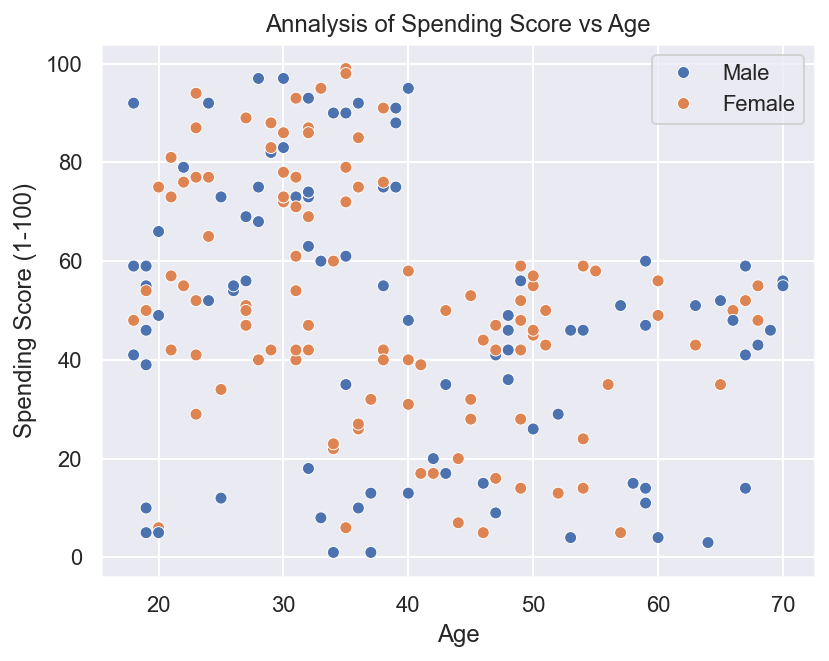

In [313]:
plot_scatter(df_cust['Age'],df_cust['Spending Score (1-100)'] ,hue=df_cust['Gender'])

Scatter Plot to check the correlation between Age, Gender and Annual Income is being analysed here.
A Line fitting is done showing the Error margins.

In [258]:
# Extract Age and Annual Income columns
x = df_cust['Age']
y = df_cust['Annual Income (k$)']

# Perform a linear fit
p, cov = curve_fit(linfunc, x, y)
sigma = np.sqrt(np.diag(cov))  # Error margins


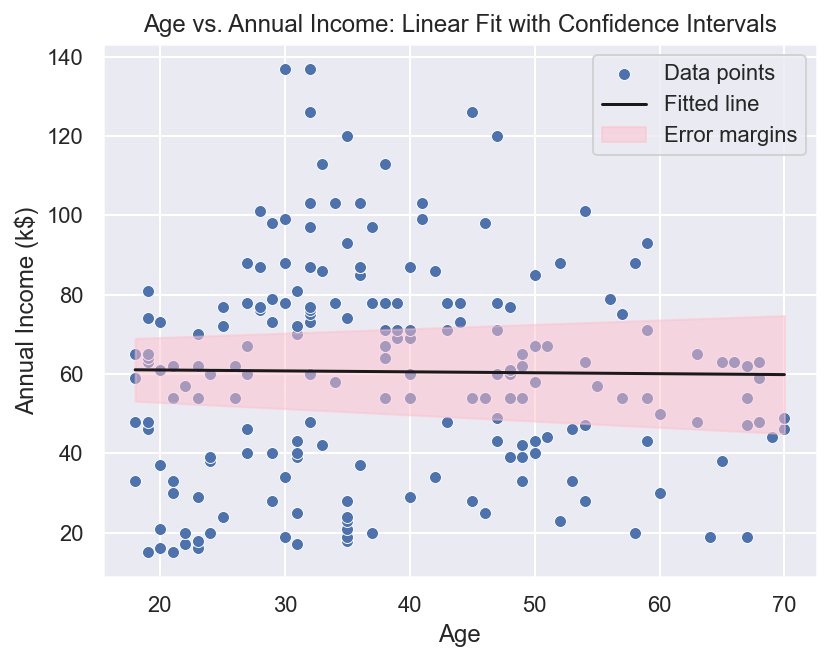

In [259]:
plot_scatter_with_fitted_line(x, y, linfunc, p, sigma)

Finding the ideal number of Clusters and dividing the data into clusters.

In [261]:
df_cut=df_cust[['Annual Income (k$)','Spending Score (1-100)']].copy()
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_cut)
inv_norm = scaler.inverse_transform(norm)

C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 2 clusters silhoutte score = 0.33


C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 3 clusters silhoutte score = 0.45


C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 4 clusters silhoutte score = 0.50


C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 5 clusters silhoutte score = 0.56


C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 6 clusters silhoutte score = 0.54


C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 7 clusters silhoutte score = 0.52


C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 8 clusters silhoutte score = 0.43


C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 9 clusters silhoutte score = 0.44


C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 clusters silhoutte score = 0.45
Best number of clusters =  5


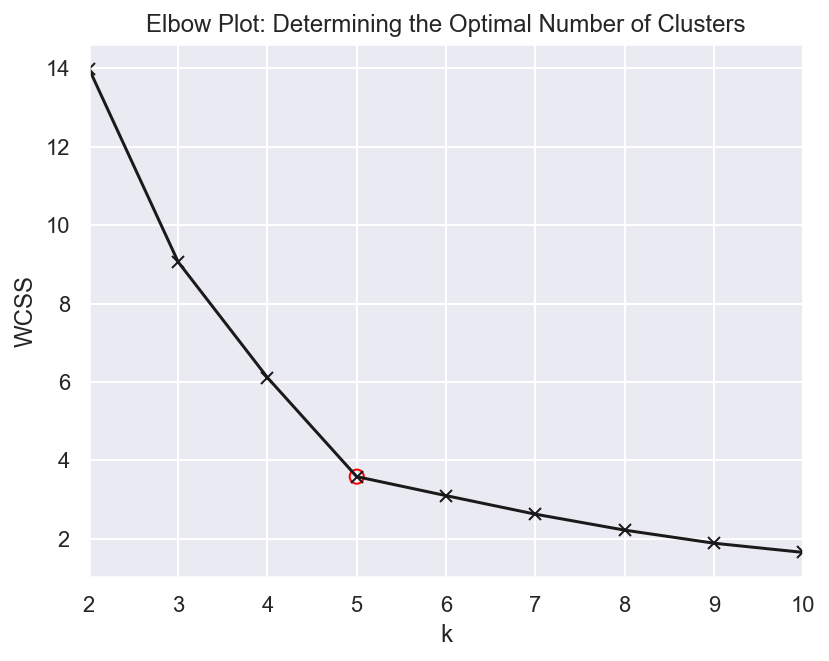

In [262]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)

Plotting the data divided into ideal number of Clusters which is 5 here.

C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


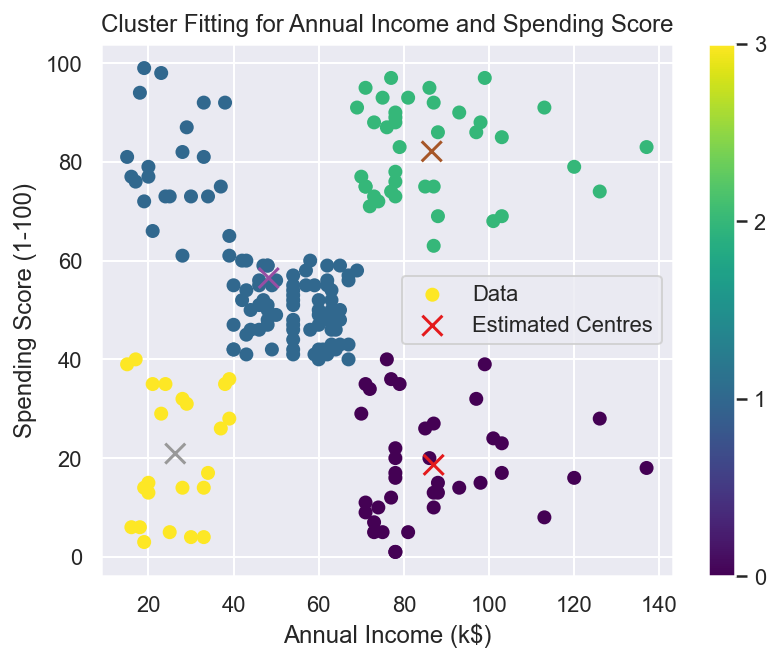

C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


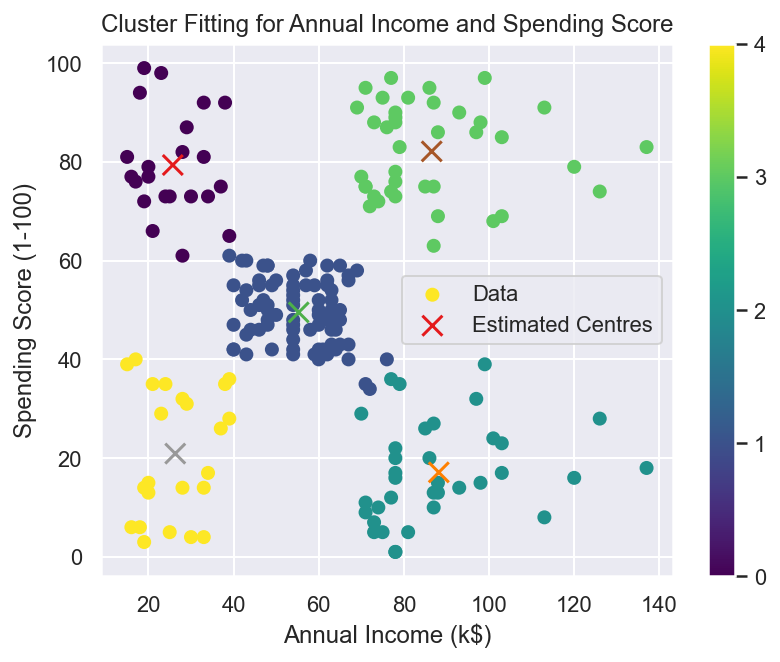

In [264]:
for k in range(4,6):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    
    plot_fitted_Cluster(labels, inv_norm, xkmeans, ykmeans, cenlabels)

There are five clusters created in the data , showing the spending scores based on Annual income. We can observe there are 2 clusters in the same annual income group having a low  and high spending score. A very high income group with low spending score is a potential market where the Retail has to focus here.